In [ ]:
import math
from math import log
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np
import extractor as ext
import pandas as pd

# Nonlinear measures for dynamic system
# import nodls

In [ ]:
fbase = pd.read_csv('./1_filtered.csv', header=None)

In [1]:
extractor = ext.RecordExtractor()
cycles = extractor.read_sample(fbase)
len(cycles)

1280000
1280000
1280000
1280000
1280000
1280000
1280000
1280000
1280000
1280000
1280000
1280000
1280000
1280000
1280000
1280000
1280000
1280000
1280000
1280000


4

Implement feature extractors:

1. SampEn - Sample Entropy
2. RMS - Root Mean Square
3. WL - Waveform Length
4. WAMP - Willison Amplitude
5. ApEn - Approximate entropy
6. MAV - Mean Absolute Value

# SampEn

Sample entropy (SampEn) is a modification of approximate entropy (ApEn), used for assessing the complexity of physiological time-series signals, diagnosing diseased states. SampEn has two advantages over ApEn: data length independence and a relatively trouble-free implementation.

In [2]:
import nolds

nolds.sampen(cycle_01.grip[:int(.2*extractor._freq)])

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
Cell In[5], line 3
      1 import nolds
----> 3 nolds.sampen(cycle_01.grip[:int(.2*extractor._freq)])

NameError: name 'cycle_01' is not defined


In [3]:
data = []
names = []
for i in range(20):
    window_s = .2 * (i+1)
    window = window_s * extractor._freq
    data.append(nolds.sampen((cycle_01.grip[:int(window)])))
    names.append("{0:0.2f}s".format(window_s))

data.append(nolds.sampen(cycle_01.grip[:int(window)]))
names.append('{0:0.2f}s'.format(cycle_01.grip.__len__()/extractor._freq))
print(data)


plt.bar(names, data)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
Cell In[6], line 6
      4     window_s = .2 * (i+1)
      5     window = window_s * extractor._freq
----> 6     data.append(nolds.sampen((cycle_01.grip[:int(window)])))
      7     names.append("{0:0.2f}s".format(window_s))
      9 data.append(nolds.sampen(cycle_01.grip[:int(window)]))

NameError: name 'cycle_01' is not defined


# RMS - Root Mean Square 
Is the sum of all squared values, divided by the amount and made a square root
Also named as Effective Value

In [4]:
# Cycles 4 Sensors with 5 Cycles
cycle_01 = cycles[0][0]
print(cycle_01)
print(len(cycle_01.grip))
cycle_01.grip.info()

12000
<class 'pandas.core.series.Series'>
RangeIndex: 12000 entries, 108000 to 119999
Series name: 0
Non-Null Count  Dtype  
--------------  -----  
12000 non-null  float64
dtypes: float64(1)
memory usage: 93.9 KB


In [ ]:
def rms(sample, window=200):
    return np.sqrt(np.mean(sample**2))

In [5]:
rms(cycle_01.grip)

0.023864513859219446

In [6]:
# Choose the range, or the window
rms(cycle_01.grip[:int(.2*extractor._freq)])

0.02493058423110956

[0.02493058423110956, 0.025201874107211978, 0.027130253427377897, 0.025025661738195662, 0.029781746217193476, 0.029781746217193476]


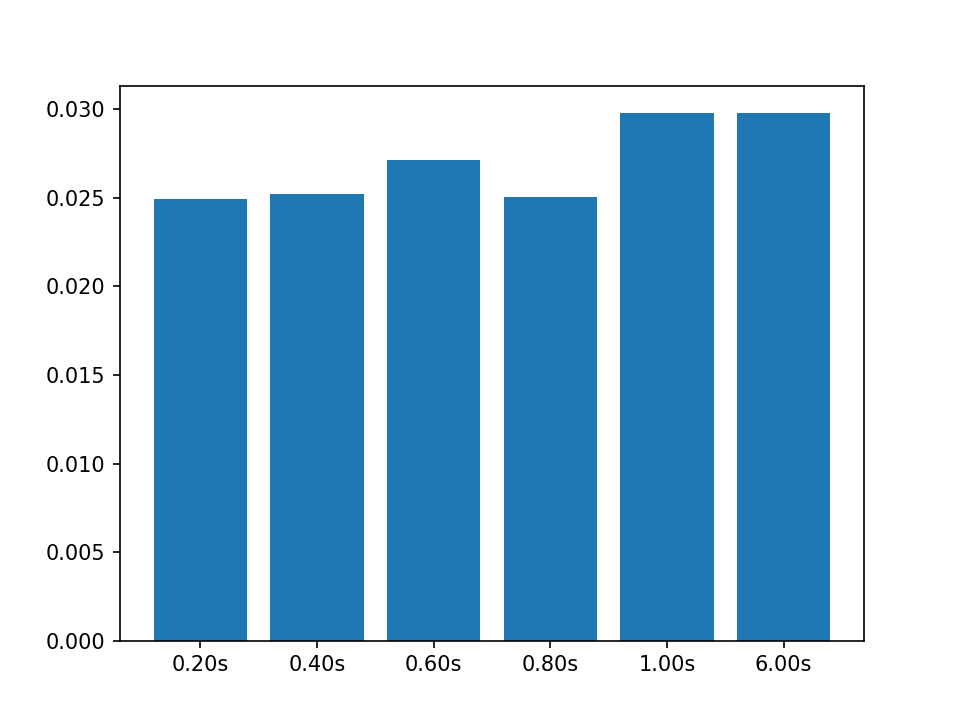

<BarContainer object of 6 artists>

In [7]:
data = []
names = []
for i in range(5):
    window_s = .2 * (i+1)
    window = window_s * extractor._freq
    data.append(rms(cycle_01.grip[:int(window)]))
    names.append("{0:0.2f}s".format(window_s))

data.append(rms(cycle_01.grip[:int(window)]))
names.append('{0:0.2f}s'.format(cycle_01.grip.__len__()/extractor._freq))
print(data)


plt.bar(names, data)

Waveform Length
Waveform length is a measure of complexity of the EMG signal. It is defined as cumulative length of the EMG waveform over the time segment.

![Wave Formula](./wavelength_formula.png)

In [ ]:
def waveformlen(sample):
    sum = 0
    for i in range(len(sample)-1):
        sum += math.fabs(sample[i+1] - sample[i])
    return sum

In [8]:
waveformlen(np.array(cycle_01.grip[:int(.2*extractor._freq)]))

3.0441391619407665

[3.0441391619407665, 6.253401098561423, 10.018518552072353, 11.9663951364319, 17.022296042432373, 17.022296042432373]


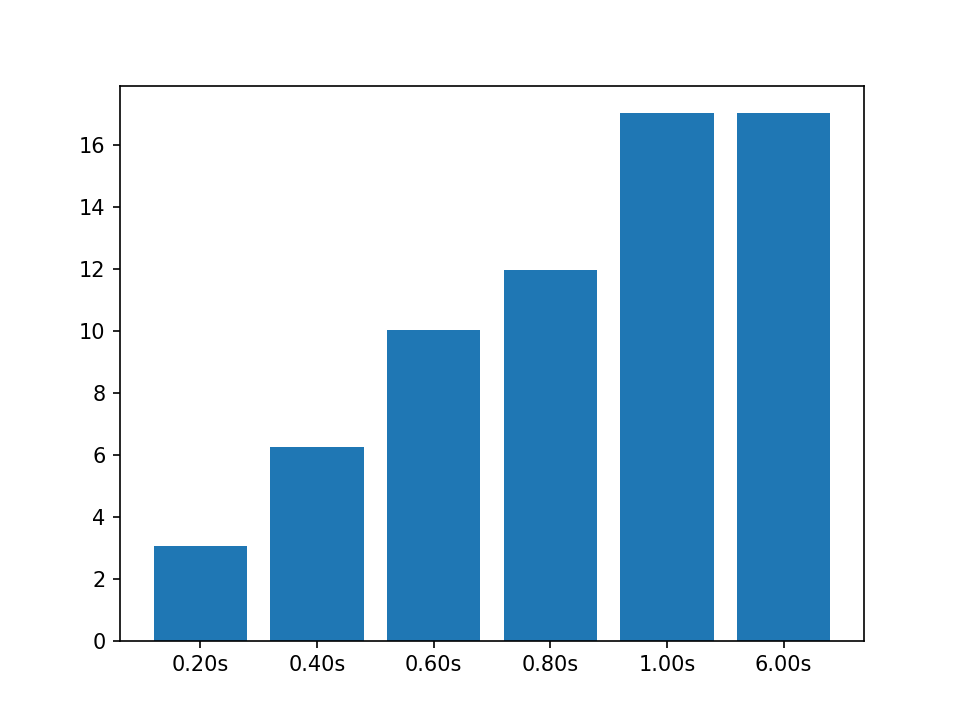

<BarContainer object of 6 artists>

In [9]:
data = []
names = []
for i in range(5):
    window_s = .2 * (i+1)
    window = window_s * extractor._freq
    data.append(waveformlen(np.array(cycle_01.grip[:int(window)])))
    names.append("{0:0.2f}s".format(window_s))

data.append(waveformlen(np.array(cycle_01.grip[:int(window)])))
names.append('{0:0.2f}s'.format(cycle_01.grip.__len__()/extractor._freq))
print(data)

plt.bar(names, data)

# Willison Amplitude
Willison  amplitude  (WAMP)  is  the  number  of counts  for  each  change  in  the  EMG  signal amplitude  that  exceeds  a  predefine threshold

![wamp](./wamp.png)

In [ ]:
def wamp(sample, threshold=10):
    """
    @param: sample - Sample based on volts
    @param: threshold - Based on milivolts
    """
    threshold /= 1000
    sum = 0
    for i in range(len(sample)-1):
        v = math.fabs(sample[i] - sample[i+1])
        if v > threshold:
            sum += 1
    return sum

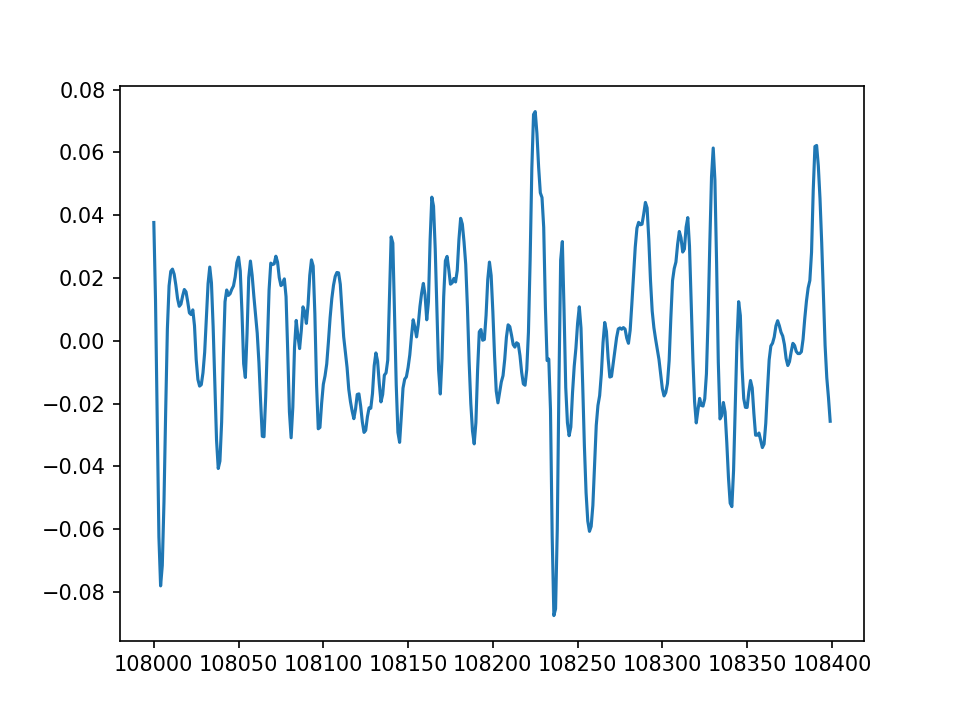

In [10]:
plt.plot(cycle_01.grip[:int(.2*extractor._freq)])

In [11]:
wamp(np.array(cycle_01.grip[:int(.2*extractor._freq)]))

104

[104, 223, 374, 422, 599, 599]


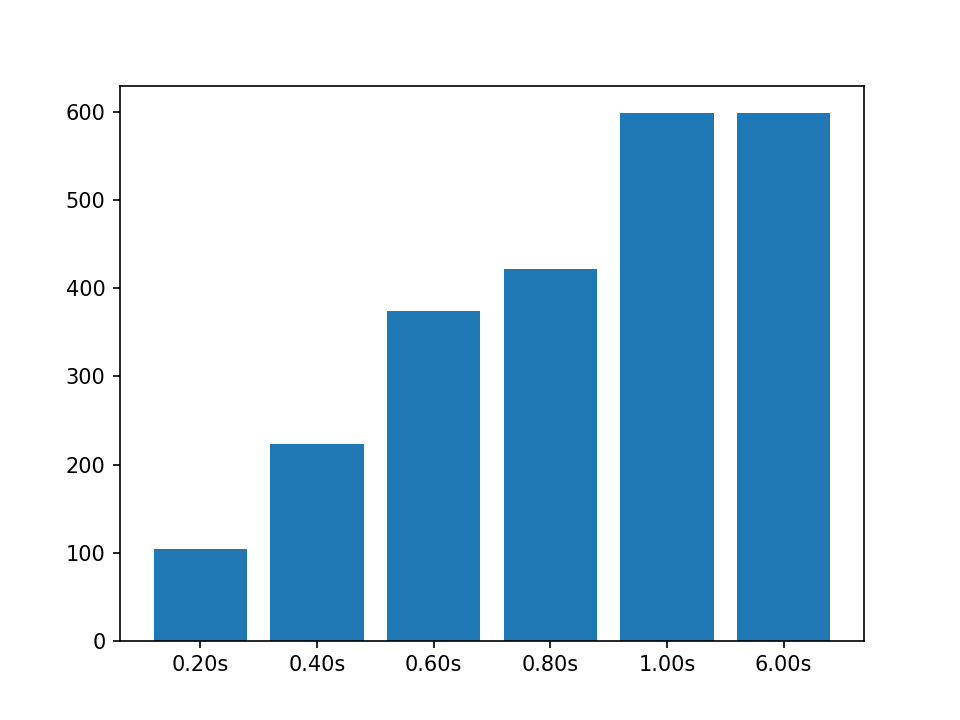

<BarContainer object of 6 artists>

In [12]:
data = []
names = []
for i in range(5):
    window_s = .2 * (i+1)
    window = window_s * extractor._freq
    data.append(wamp(np.array(cycle_01.grip[:int(window)])))
    names.append("{0:0.2f}s".format(window_s))

data.append(wamp(np.array(cycle_01.grip[:int(window)])))
names.append('{0:0.2f}s'.format(cycle_01.grip.__len__()/extractor._freq))
print(data)

plt.bar(names, data)

# Approximate Entropy
ApEn, technique used to quantify the amount of regularity and the unpredictability of fluctuations over time-series data.

The approximate entropy explains the complexity of the irregularity, quantifies how predictible the values of a time series are.

In [13]:
import EntropyHub as EH

EH.ApEn(cycle_01.grip[:int(.2*extractor._freq)]) # Won't work, don't know why

---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
Cell In[23], line 1
----> 1 import EntropyHub as EH
      3 EH.ApEn(cycle_01.grip[:int(.2*extractor._freq)]) # Won't work, don't know why

ModuleNotFoundError: No module named 'EntropyHub'


In [14]:
import antropy as an

an.app_entropy(cycle_01.grip[:int(.2*extractor._freq)]) # Slow

0.7642442256935573

[0.7642442256935573, 0.8496538373330851, 0.8796753884363979, 0.8834749189590991, 0.8460622127687967, 0.8352266492902176, 0.8672239859038537, 0.8824952162298438, 0.8994238100559344, 0.9090981922089045, 0.9172867116062906, 0.9258399211929005, 0.9274557653764322, 0.9271643673504917, 0.9305139764704395, 0.9306771510028624, 0.9311101142723794, 0.93086978548186, 0.9337957113379365, 0.9335338044701076, 0.9335338044701076]


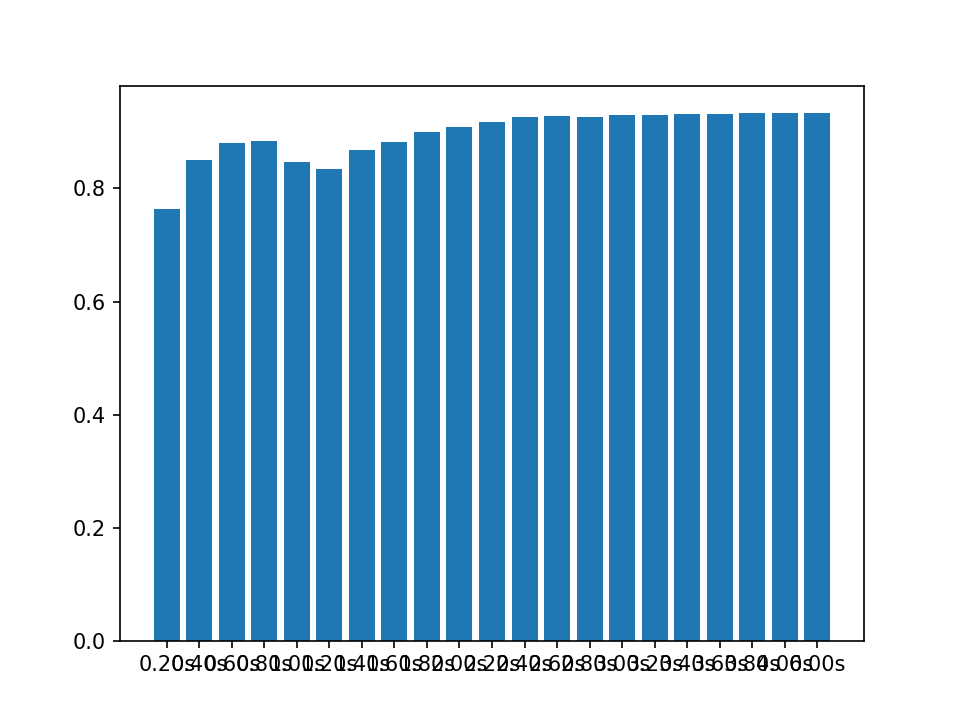

<BarContainer object of 21 artists>

In [15]:
data = []
names = []
for i in range(20):
    window_s = .2 * (i+1)
    window = window_s * extractor._freq
    data.append(an.app_entropy(np.array(cycle_01.grip[:int(window)])))
    names.append("{0:0.2f}s".format(window_s))

data.append(an.app_entropy(np.array(cycle_01.grip[:int(window)])))
names.append('{0:0.2f}s'.format(cycle_01.grip.__len__()/extractor._freq))
print(data)

plt.bar(names, data)

MAV - Mean Absolute Value
Measures the contraction level of muscles.
 
Does't looks promising

![MAV](./mav.png)

In [ ]:
def mav(sample):
    return sum(sample)/len(sample)

In [16]:
mav(cycle_01.grip[:int(.2*extractor._freq)])

0.0005289850861351532

[0.0005289850861351532, 0.00010439899978950661, -9.255468831564478e-05, 0.00015201798465576353, 0.0004765549585766338, 3.3173500827258994e-05, -3.680980761461013e-05, -8.417950028212101e-05, 0.0001652906270577527, -1.3128257854264998e-05, 8.319146969733617e-05, 3.461406491753817e-05, -3.12190634151002e-06, 1.3577507915535259e-05, 4.512024885895093e-05, 2.966045750714158e-06, 1.631090590966579e-05, 3.373851820679945e-05, -4.269529038937922e-06, 1.242450865809794e-05, 1.242450865809794e-05]


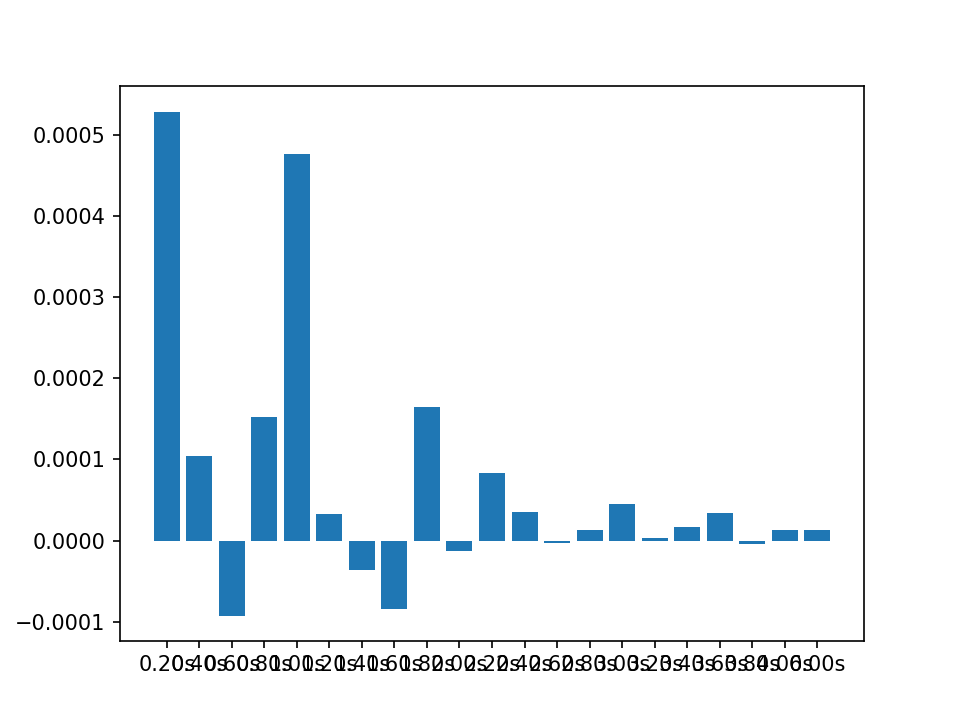

<BarContainer object of 21 artists>

In [17]:
data = []
names = []
for i in range(20):
    window_s = .2 * (i+1)
    window = window_s * extractor._freq
    data.append(mav(np.array(cycle_01.grip[:int(window)])))
    names.append("{0:0.2f}s".format(window_s))

data.append(mav(np.array(cycle_01.grip[:int(window)])))
names.append('{0:0.2f}s'.format(cycle_01.grip.__len__()/extractor._freq))
print(data)

plt.bar(names, data)